In [1]:
import numpy as np
import matplotlib.pyplot as plt

import math
import scipy.sparse as sps

from scipy.sparse.linalg import cg
from scipy.integrate import odeint

from fastprogress import progress_bar

import jlinops
import sampi


# Wavelet stuff

In [2]:
import numpy as np
import pywt
from matplotlib import pyplot as plt
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

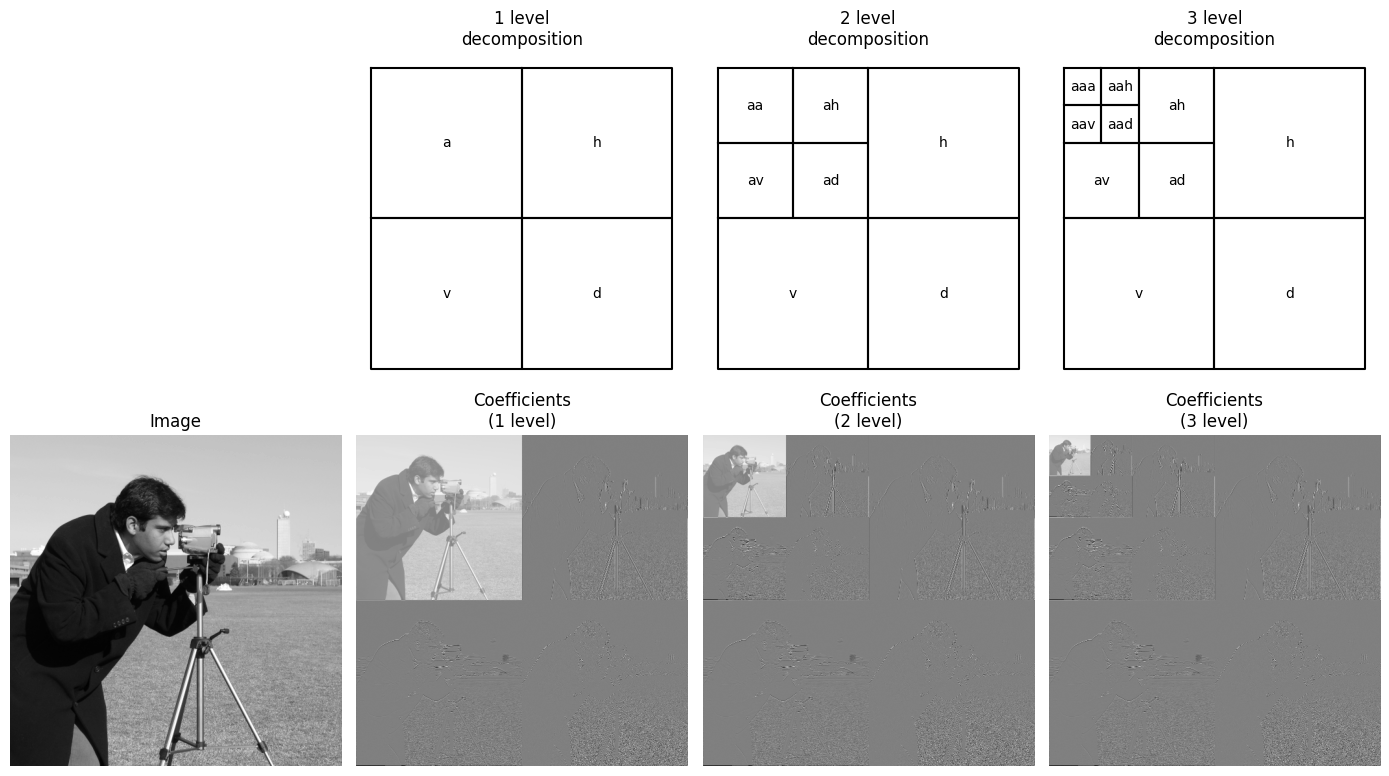

In [3]:
x = pywt.data.camera().astype(np.float32)
shape = x.shape

max_lev = 3       # how many levels of decomposition to draw
label_levels = 3  # how many levels to explicitly label on the plots

fig, axes = plt.subplots(2, 4, figsize=[14, 8])
for level in range(0, max_lev + 1):
    if level == 0:
        # show the original image before decomposition
        axes[0, 0].set_axis_off()
        axes[1, 0].imshow(x, cmap=plt.cm.gray)
        axes[1, 0].set_title('Image')
        axes[1, 0].set_axis_off()
        continue

    # plot subband boundaries of a standard DWT basis
    draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                     label_levels=label_levels)
    axes[0, level].set_title('{} level\ndecomposition'.format(level))

    # compute the 2D DWT
    c = pywt.wavedec2(x, 'db2', mode='periodization', level=level)
    # normalize each coefficient array independently for better visibility
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(level):
        c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
    # show the normalized coefficients
    arr, slices = pywt.coeffs_to_array(c)
    axes[1, level].imshow(arr, cmap=plt.cm.gray)
    axes[1, level].set_title('Coefficients\n({} level)'.format(level))
    axes[1, level].set_axis_off()

plt.tight_layout()
plt.show()

In [36]:
pywt.wavelist("rbio")

['rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',
 'rbio3.3',
 'rbio3.5',
 'rbio3.7',
 'rbio3.9',
 'rbio4.4',
 'rbio5.5',
 'rbio6.8']

In [19]:
pywt.wavelist("bior")

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8']

In [37]:
data = pywt.data.camera().astype(np.float32)
coeffs = pywt.dwt2(data, 'bior1.1', mode="periodic")
#recon = pywt.idwt2(coeffs, 'rbio1.1', mode="periodic")
recon = pywt.idwt2(coeffs, 'rbio1', mode="periodic")

In [38]:
plt.imshow(recon - data)
plt.colorbar()
plt.show()

ValueError: operands could not be broadcast together with shapes (508,508) (512,512) 

In [28]:
coeffs[1][0].shape

(256, 256)

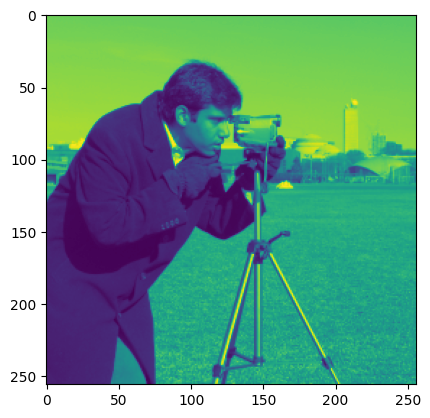

In [29]:
plt.imshow(coeffs[0])
plt.show()

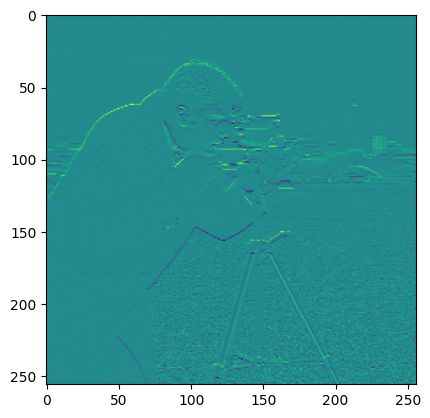

In [26]:
plt.imshow(coeffs[1][0])
plt.show()

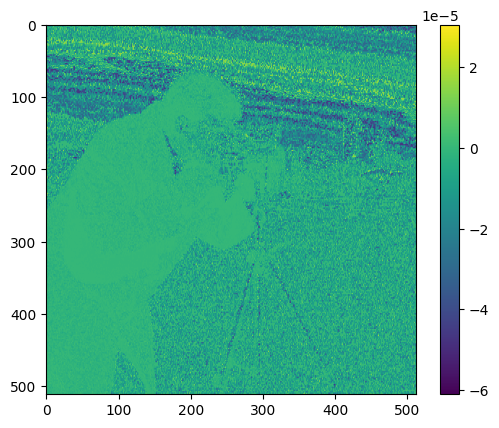

In [25]:
plt.imshow(recon - data)
plt.colorbar()
plt.show()

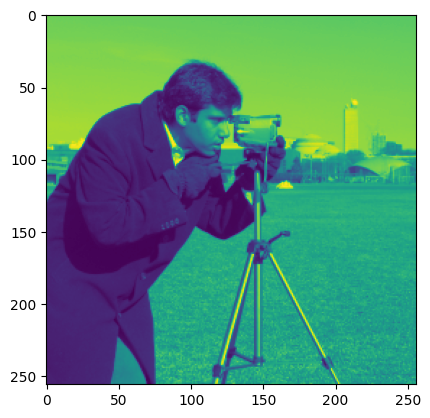

In [9]:
plt.imshow(coeffs[0])
plt.show()

In [11]:
coeffs[1]

(array([[  0.50000054,   0.50000054,   0.        , ...,   0.50000054,
          -1.0000011 ,   0.        ],
        [ -1.0000011 ,   0.50000054,   1.0000011 , ...,  -0.50000054,
           0.        ,   0.        ],
        [  0.50000054,   0.50000054,   0.        , ...,   1.0000011 ,
          -0.50000054,  -0.50000054],
        ...,
        [ -1.4999989 ,  -0.50000054,  -0.9999997 , ..., -15.500006  ,
         -16.499996  ,  -4.499999  ],
        [  0.4999992 ,  -0.50000054,  -1.0000011 , ..., -25.5       ,
           5.        ,  22.499996  ],
        [  0.        ,  -1.0000011 ,   1.4999989 , ...,   0.        ,
           1.000001  ,   3.9999986 ]], dtype=float32),
 array([[  0.5       ,  -0.5       ,  -1.        , ...,  -0.49998474,
           0.        ,   0.        ],
        [  0.        ,  -0.5       ,   0.        , ...,  -0.49998474,
           0.        ,   0.        ],
        [  0.5       ,  -0.5       ,   0.        , ...,   0.        ,
          -0.50001526,  -0.50001526]

TypeError: Invalid shape (3, 256, 256) for image data

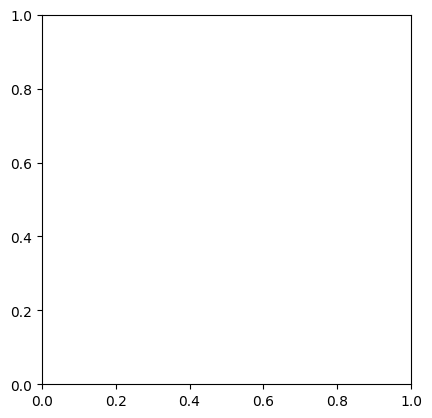

In [10]:
plt.imshow(coeffs[1])
plt.show()